# WASP-43b 18.2.2018

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathlib import Path
import pandas as pd
from corner import corner

from muscat2ta.transitanalysis import TransitAnalysis

droot = Path('.').joinpath('..','light_curves').resolve()

## Initialisation

In [3]:
target = tdir = 'wasp-43b'
night = '180218'

In [5]:
ta = TransitAnalysis(droot.joinpath(tdir, night), target, night, 0, [1,2,3], etime=15, model='pb_independent_k')

In [ ]:
ta.

In [21]:
ta.lmlpf.ps

[  0 |G| tc         [-inf ..  inf],
   1 |G| pr         [0.00 ..  inf],
   2 |G| rho        [0.00 ..  inf],
   3 |G| b          [0.00 .. 1.00],
   4 |P| k2         [0.00 .. 0.30],
   5 |P| q1_0       [0.00 .. 1.00],
   6 |P| q2_0       [0.00 .. 1.00],
   7 |P| q1_1       [0.00 .. 1.00],
   8 |P| q2_1       [0.00 .. 1.00],
   9 |P| q1_2       [0.00 .. 1.00],
  10 |P| q2_2       [0.00 .. 1.00],
  11 |P| q1_3       [0.00 .. 1.00],
  12 |P| q2_3       [0.00 .. 1.00]]

In [24]:
from pytransit.param.parameter import UniformPrior as UP, NormalPrior as NP

In [23]:
ta.set_prior(2, NP(, 2.5))

In [6]:
ta.optimize_comparison_stars(n_stars=3)

Optimising comparison stars: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


## Linear baseline model

In [7]:
ta.optimize('linear', 500)

Optimizing linear model:  81%|████████▏ | 407/500 [00:22<00:05, 18.09it/s]


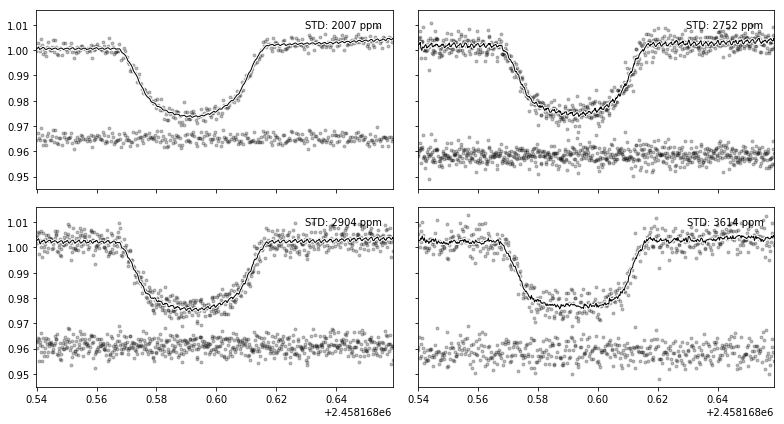

In [10]:
ta.plot_light_curve(detrend_obs=False, detrend_mod=False);

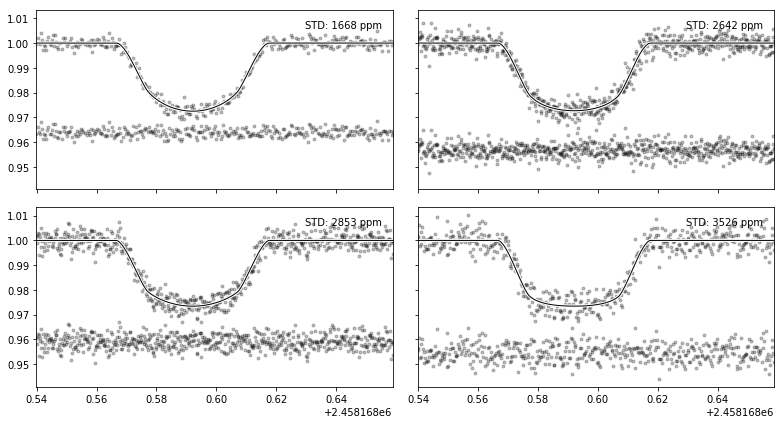

In [8]:
ta.plot_light_curve(detrend_obs=True);

In [11]:
ta.learn_gp_hyperparameters(joint_fit=False)

Optimizing GP hyperparameters: 100%|██████████| 4/4 [00:22<00:00,  4.76s/it]


In [12]:
ta.optimize('gp', 500)

Optimizing GP model:  50%|████▉     | 249/500 [00:47<00:50,  4.93it/s]


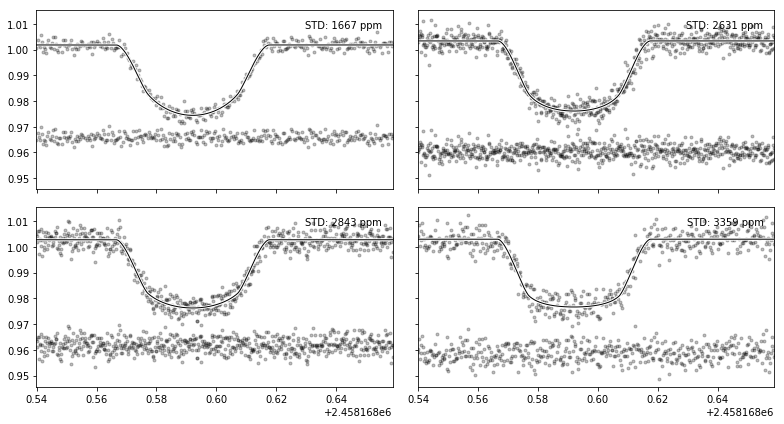

In [13]:
ta.plot_light_curve('gp', 'de', detrend_obs=True);

In [14]:
ta.sample('gp', 500, thin=10)
ta.sample('gp', 500, thin=10, reset=True)

Sampling linear model: 100%|██████████| 500/500 [01:09<00:00,  7.18it/s]


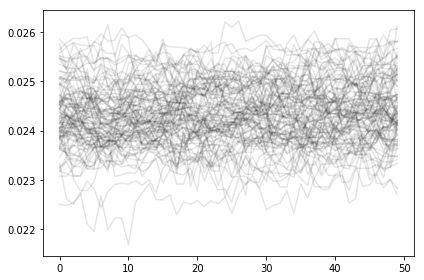

In [18]:
ta.plot_mcmc_chains(4);

In [19]:
df = pd.DataFrame(ta.gplpf.sampler.chain[:,:,:9].copy().reshape([-1,9]), columns=ta.gplpf.ps.names[:9])
df['k'] = sqrt(df['k2'])
df.drop('k2', axis=1, inplace=True)

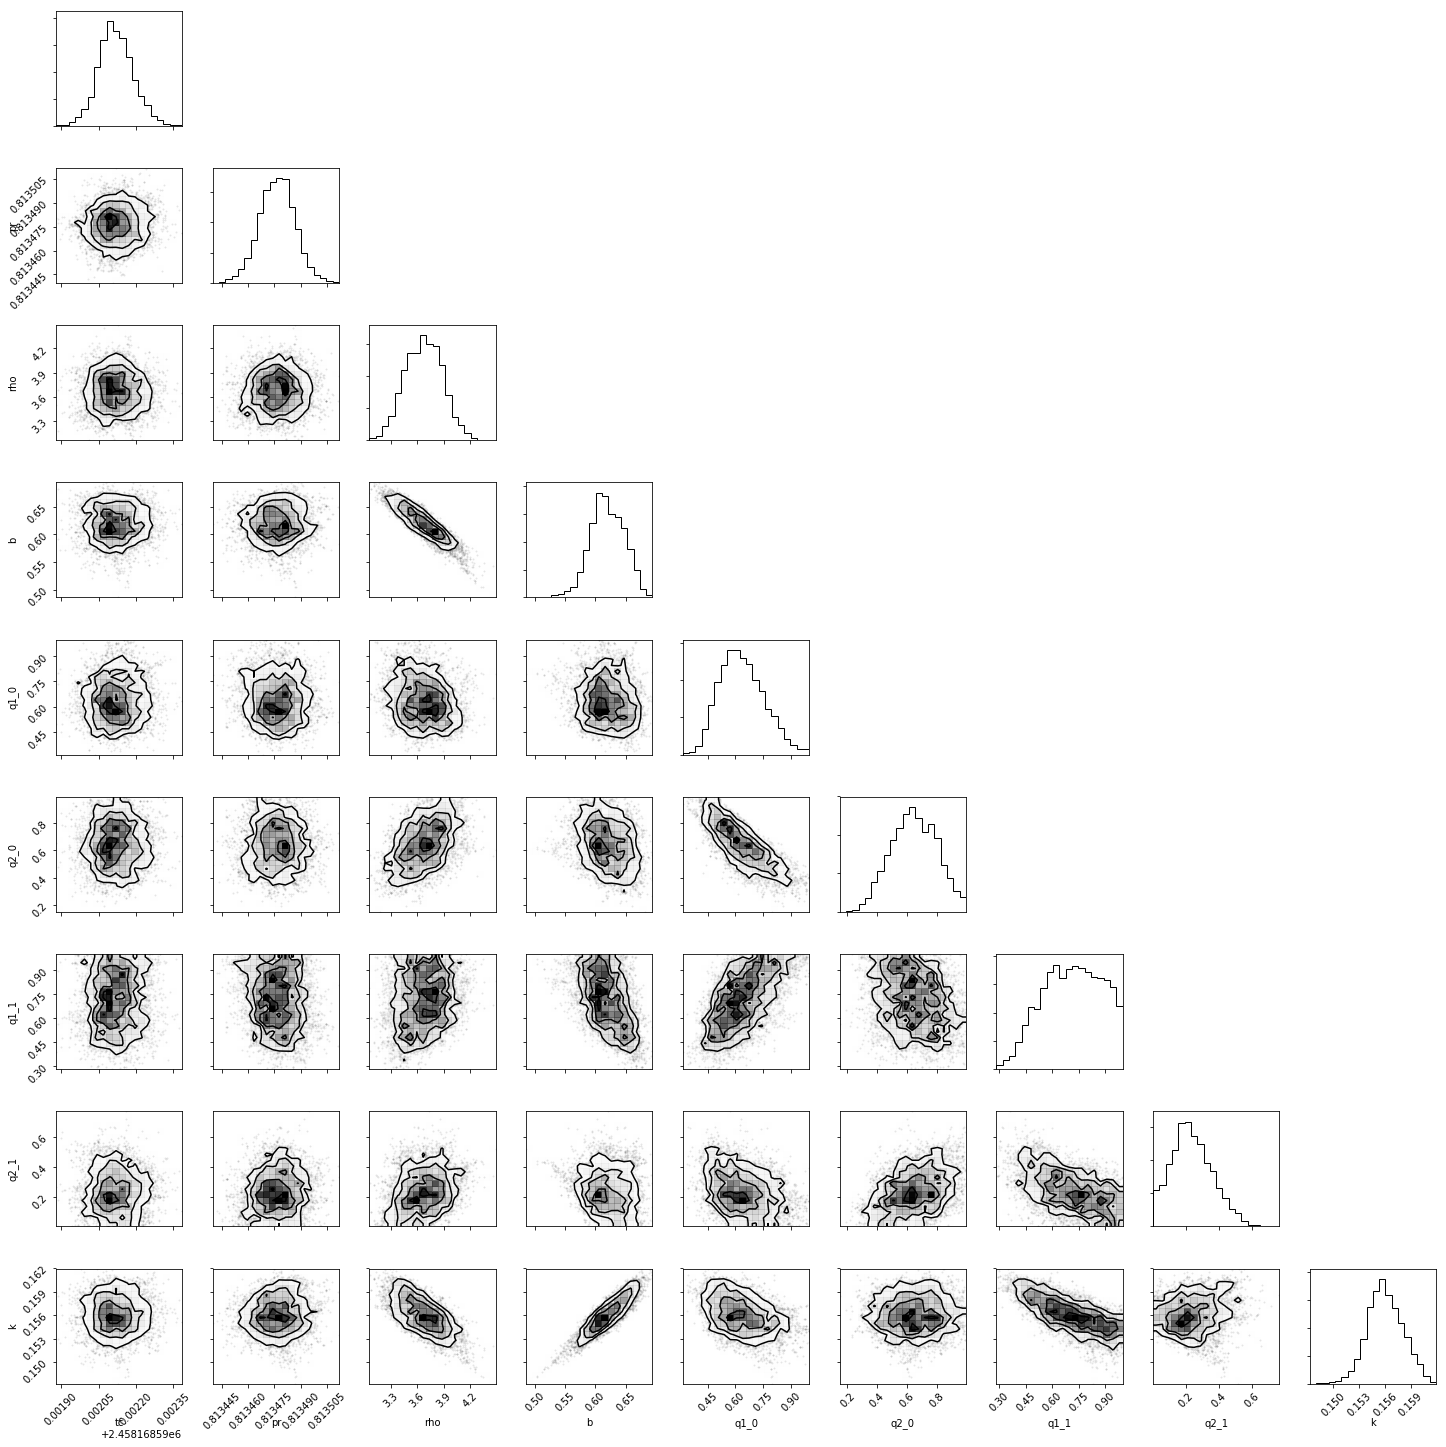

In [20]:
corner(df);

In [15]:
ta.save()
ta.save_fits('linear', npoly=0)
ta.save_fits('gp', npoly=0)

---

<center> &copy; 2018 Hannu Parviainen </center>